In [1]:
import numpy as np
import maze as mz
import matplotlib.pyplot as plt

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0],
])
# with the convention
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

In [3]:
# Create an environment maze
env = mz.Maze(maze, minotaur_stay=True)

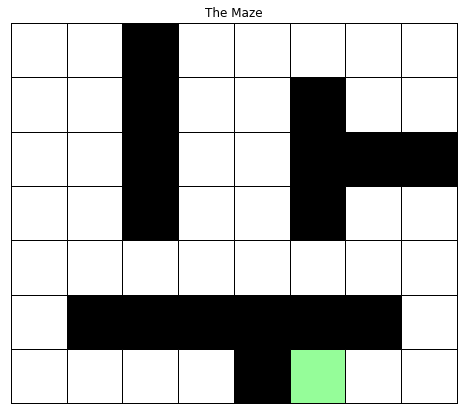

In [4]:
mz.draw_maze(maze)

In [5]:
# Finite horizon MDP
horizon = 20
V, policy = mz.dynamic_programming(env, horizon)

In [6]:
start  = (0, 0, 6, 5)
path = env.simulate(start, policy, method='DynProg')

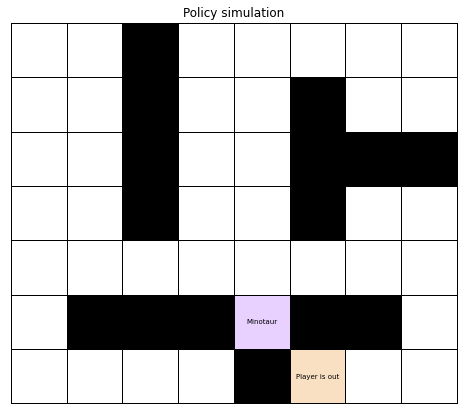

In [7]:
mz.animate_solution(maze, path)

## Optimal policy at T=20 (when minotaur can stay or always makes a move)

In [8]:
env = mz.Maze(maze, minotaur_stay=False)
V, policy_nonstay = mz.dynamic_programming(env, horizon=20)

In [9]:
env = mz.Maze(maze, minotaur_stay=True)
V, policy_stay = mz.dynamic_programming(env, horizon=20)

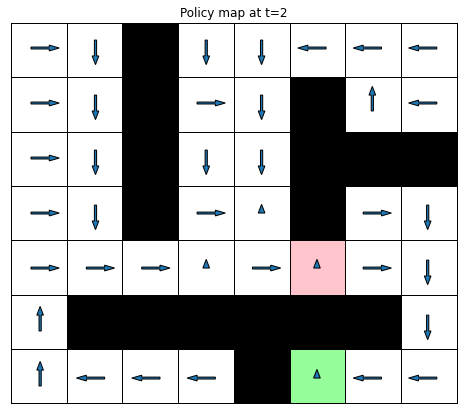

In [10]:
mz.draw_arrows(env, policy_nonstay, t=2, minotaur_pos=(4, 5))
plt.savefig('images/policy_nonstay_t2_m45.png')

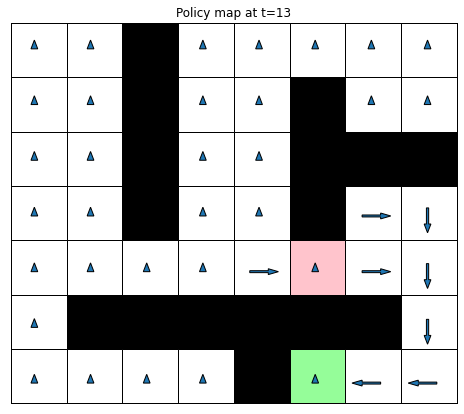

In [11]:
mz.draw_arrows(env, policy_nonstay, t=13, minotaur_pos=(4, 5))
plt.savefig('images/policy_nonstay_t13_m45.png')

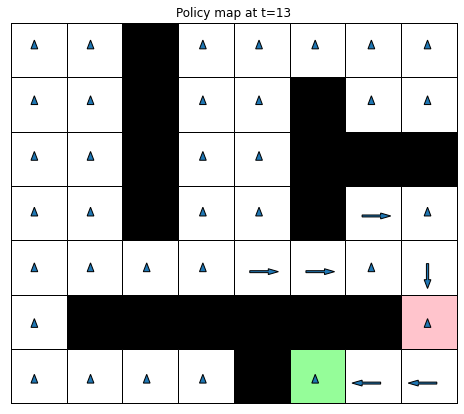

In [12]:
mz.draw_arrows(env, policy_nonstay, t=13, minotaur_pos=(5, 7))
plt.savefig('images/policy_nonstay_t13_m57.png')

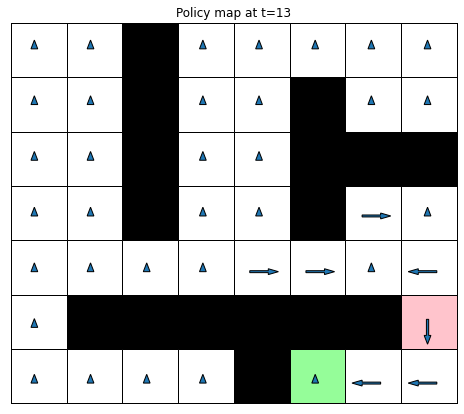

In [13]:
mz.draw_arrows(env, policy_stay, t=13, minotaur_pos=(5, 7))
plt.savefig('images/policy_stay_t13_m57.png')

## Survival probability (maximum probability of exiting the maze as a function of T)

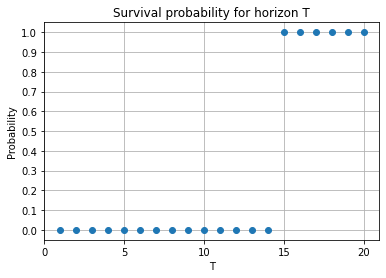

In [14]:
mz.survival_probability(maze, False, method='DynProg', num_simulations=10000, T=20)
plt.savefig('images/survival_dynprog_nonstay.png')

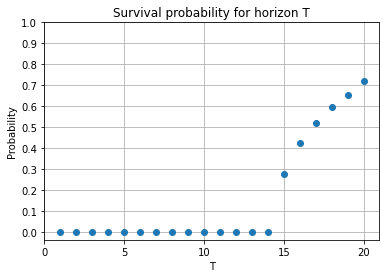

In [15]:
mz.survival_probability(maze, True, method='DynProg', num_simulations=10000, T=20)
plt.savefig('images/survival_dynprog_stay.png')

## Value Iteration

Here we solve the discounted infinite-horizon MDP problem using value iteration, the objective here is to find a stationary policy $\pi$ that minimizes the infinite horizon objective with a discount factor $\gamma$ 
$$
    \mathbb{E} \Big[\sum_{t=0}^\infty \gamma^t r\big(s_t, \pi(s_t)\big) \Big].
$$
Recall the Bellman equation in the case of a stationary policy $\pi$ 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V^*(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V^*(s') \Big\rbrace
\end{equation}
or equivalently in terms of the Bellman operator $\mathcal{L}$ 
\begin{equation}
V^* =  \mathcal{L}(V^*)
\end{equation}
where 
\begin{equation}
   \forall s \in \mathcal{S} \qquad  \mathcal{L}(V)(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V(s') \Big\rbrace. 
\end{equation}
Value iteration solves the Bellman equation described above. This method is implemented as `maze.value_iteration` in the file [maze.py](maze.py).

> **Note:** Recall that the mapping $\mathcal{L}$ is a contraction, therefore value iteration converges. To achieve an $\varepsilon>0$ approximation (i.e. $\Vert V^* - V_{n+1} \Vert \le \varepsilon$),
 the stopping criterion of value iteration is $\Vert V - \mathcal{L}(V) \Vert < \frac{1-\gamma}{\gamma}\varepsilon$.

In [16]:
gamma = 29/30
epsilon = 0.0001
num_simulations = 10000

In [19]:
sr_nonstay = mz.survival_probability(maze, False, method='ValIter', gamma=gamma, epsilon=epsilon, num_simulations=num_simulations)
print(f'Survival probability (geometric life - minotaur cannot stay): {sr_nonstay*100:.2f}%')

Survival probability (geometric life - minotaur cannot stay): 62.60%


In [20]:
sr_stay = mz.survival_probability(maze, True, method='ValIter', gamma=gamma, epsilon=epsilon, num_simulations=num_simulations)
print(f'Survival probability (geometric life - minoutatur can stay): {sr_stay*100:.2f}%')

Survival probability (geometric life - minoutatur can stay): 54.60%
